![GMIT](GMIT-logo.png)

#  <div align="center"> Fundamentals of Data Analysis <div>
## <div align="center"> Project_2020 <div>

## Author: Shane Rylands

### G00387904@gmit.ie

***

## <u>Instructions<u>

In this project you must perform and explain simple linear regression using Python on the `powerproduction` dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.
***

In [30]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [31]:
df = pd.read_csv('powerproduction.csv')

### Initial Investigation 
***

In [32]:
# check the file is ok
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [33]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [34]:
df.iloc[245:255,:]

,speed,power
245,12.387,37.159
246,12.412,52.952
247,12.462,44.745
248,12.487,44.735
249,12.538,44.801
250,12.563,42.336
251,12.588,54.079
252,12.613,51.471
253,12.663,44.880
254,12.713,51.149


In [35]:
# Get a summary of the file
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [36]:
df[df['power'] > 0]

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [37]:
df[df['power'] == 0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [38]:
noPower = df['power'] == 0

In [39]:
noPower.head(5)

0    True
1    True
2    True
3    True
4    True
Name: power, dtype: bool

In [40]:
# [] https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/#:~:text=One%20way%20to%20filter%20by,based%20on%20year's%20value%202002.
noPowerProduction = df[df['power']==0]

In [41]:
noPowerProduction.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [42]:
noPowerProduction.shape

(49, 2)

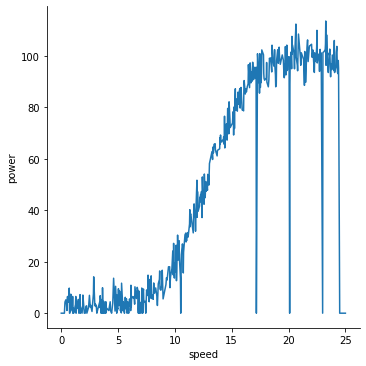

In [43]:
# [] https://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="speed", y="power", kind="line", data=df)

In [44]:
speed = df['speed']
power = df['power']

In [45]:
np.polyfit(speed, power,1)

array([  4.91759567, -13.89990263])

In [46]:
m,c = np.polyfit(speed, power,1)

In [47]:
m,c 

(4.9175956654046695, -13.899902630519595)

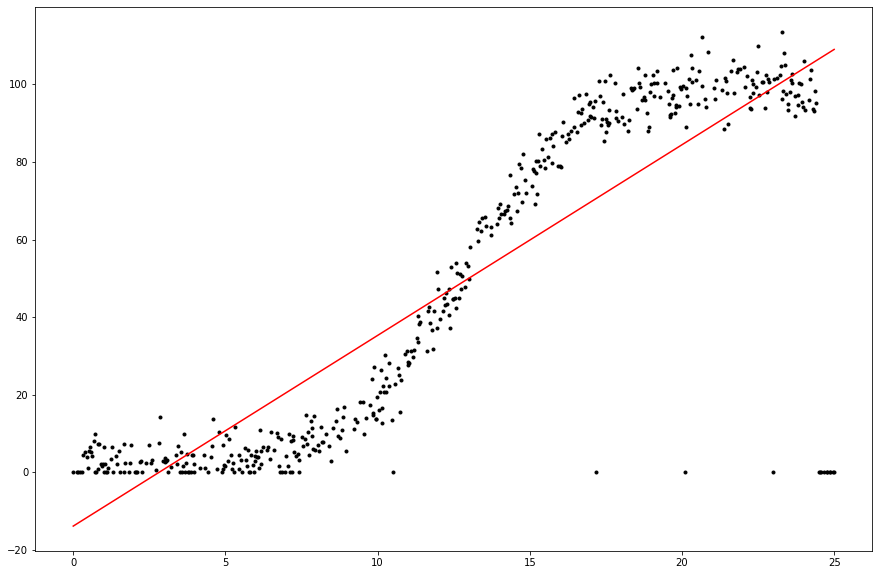

In [48]:
plt.plot(speed, power, 'k.')
plt.plot(speed,m * speed + c, 'r-')

In [49]:
m,c = np.polyfit(speed, power, 1)

In [81]:
print(m)
print(c)

4.9175956654046695
-13.899902630519595


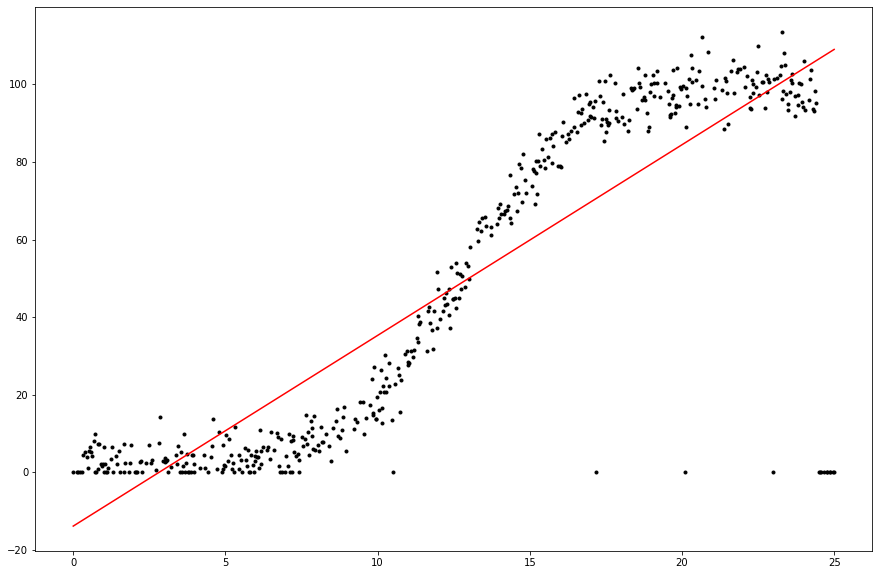

In [50]:
plt.plot(speed, power, 'k.')
plt.plot(speed,m * speed + c, 'r-')

### Predicting 

In [67]:
Speed = df['speed']
Power = df['power']

In [68]:
# https://stackoverflow.com/questions/49514684/python-sklearn-fit-array-error/49517796
# https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.Series.reshape.html
Speed = Speed.values.reshape(-1, 1)

In [69]:
import sklearn.model_selection as mod
speed_train, speed_test, power_train, power_test  = mod.train_test_split(Speed, Power, test_size=0.2, random_state = 0)

In [70]:
import sklearn.linear_model as lin
reg = lin.LinearRegression()

In [71]:
reg.fit(speed_train, power_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
reg.predict(speed_test)

array([ 10.40860499,  48.63205052,  57.32631785,  96.16169099,
       100.32769408, -10.0493585 ,  65.04639644, 105.83993789,
        24.86478258,  23.76331291,  46.42421575,  47.89773741,
        82.32233641,  58.55506847,  28.17408704,  68.23331537,
       101.42916376,  73.50078814,  24.00808394,  -5.39381333,
        37.1131254 ,  76.43804062,  46.17944471,  14.32983704,
        -2.94610293,  94.81545027,  -8.94788882,  76.56042614,
        11.51007466,  44.46604743,  91.50614581,  15.9208488 ,
        16.89993296,  34.78780053,  78.27871884, 106.70153195,
        63.5777702 ,  97.63521264,  72.6440895 ,  45.93467367,
        66.88217923,  -2.70133189,  84.52527577,  41.2791285 ,
         5.50828877, -12.99150639,  39.07618914,  67.62138777,
        88.07935126,  12.9787009 ,  75.82611302,  27.80203506,
        71.29295337,  21.80024917,  19.47492429, -10.53890058,
        67.98854433,  28.78601464,  41.89105609,  71.17056785,
         5.75305981,  55.61292057,  81.58312787,  91.13

In [76]:
reg.predict(speed_test) == power_test

90     False
254    False
283    False
445    False
461    False
       ...  
372    False
56     False
440    False
60     False
208    False
Name: power, Length: 100, dtype: bool

In [77]:
(reg.predict(speed_test) == power_test).sum()

0

In [80]:
print(reg.coef_)
print(reg.intercept_)

[4.89542079]
-13.603433993820211


In [1]:
import sklearn. neighbors as nei

In [2]:
# create my inputs and outputs
inputs = df[['speed']]
outputs = df[['power']]

NameError: name 'df' is not defined

### Plotting 

As we are dealing continous, numerical, bivariant data, the most appropriate plot to use is a scatterplot. [1][2]

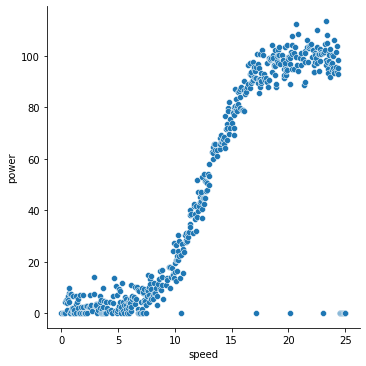

In [59]:
# plot the data
#sns.scatterplot(data=df)
# x = the independent variable, y = dependent variable [] https://www.youtube.com/watch?v=zPG4NjIkCjc
# x value is the input, y value is the output
sns.relplot(x="speed", y="power", data=df);

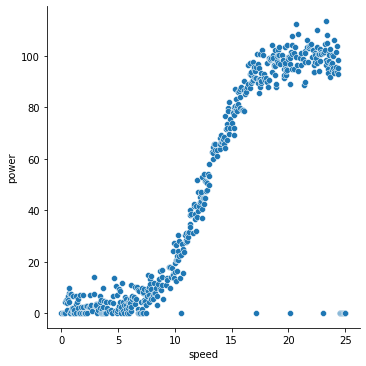

In [60]:
# plot the data
#sns.scatterplot(data=df)
# x = the independent variable, y = dependent variable [] https://www.youtube.com/watch?v=zPG4NjIkCjc
# x value is the input, y value is the output
sns.relplot(x="speed", y="power", data=df)

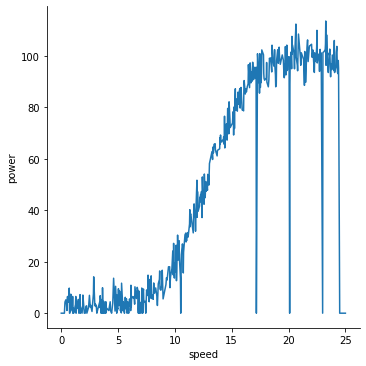

In [65]:
# plot the data
#sns.scatterplot(data=df)
# x = the independent variable, y = dependent variable [] https://www.youtube.com/watch?v=zPG4NjIkCjc
# x value is the input, y value is the output
sns.relplot(x="speed", y="power", kind="line", data=df)

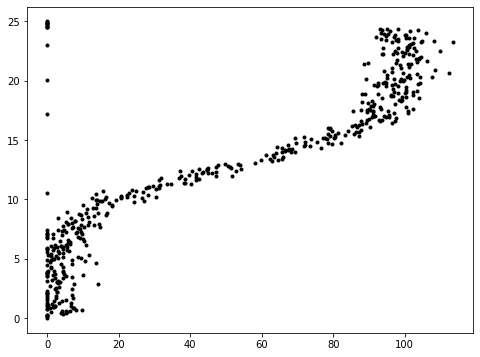

In [55]:
plt.plot(df["power"], df["speed"],'k.' )


### Reference

[1] https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

[2] https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

[3] https://www.youtube.com/watch?v=aq8VU5KLmkY&list=RDCMUC6AVa0vSrCpuskzGDDKz_EQ&start_radio=1&t=0